In [18]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_wires = 5
dev = qml.device("default.qubit", wires = num_wires)

@qml.qnode(dev)

def simple_nn(weights):

    qml.BasicEntanglerLayers(weights, wires = range(num_wires), rotation = qml.RX)
    return qml.expval(qml.PauliZ(wires = 0))


0.18294472697247233


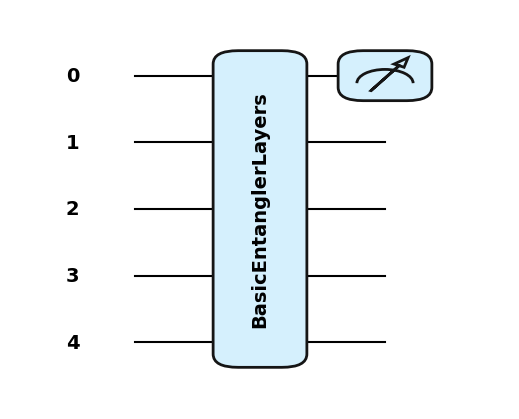

In [29]:
weights = [[0.1,0.2,0.3,0.4,0.5],
           [0.6,0.7,0.8,0.9,1.0]]

circuit = simple_nn(weights)
print(circuit)

fig, ax = qml.draw_mpl(simple_nn, style= "pennylane")(weights)
fig.set_size_inches(5,4)
plt.show()


In [30]:
# Coodercise 4.1

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit_as_function(params):
    """
    Implements the circuit shown in the codercise statement.
    Args:
    - params (np.ndarray): [theta_0, theta_1, theta_2, theta_3]
    Returns:
    - (np.tensor): <Z0>
    """

    qml.RX(params[0], wires = 0)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.CNOT(wires = [2,0])
    qml.RY(params[1], wires = 0)
    qml.RY(params[2], wires = 1)
    qml.RY(params[3], wires = 2)

    return qml.expval(qml.PauliZ(wires = 0))

angles = np.linspace(0, 4 * np.pi, 200)
output_values = np.array([circuit_as_function([0.5, t, 0.5, 0.5]) for t in angles])